## Import Libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
print("Import Successful")
import missingno

Import Successful


### From Product Listing page 🔽
##### link: Stores product links.
##### rating: Stores product ratings.
##### price: Stores product prices.
##### names: Stores product names.

#### Extracting Ratings 
##### Checks if the product has a rating (class _5OesEi stores ratings).
##### If found, extracts the first three characters (e.g., "4.5").
##### If no decimal point is present, takes the first digit (e.g., "4").
##### If no rating exists, appends 'NaN'_

##### _Total_pages is set to 84 as we are scrapping all the pages for Laptop_

In [83]:
link=[]
rating=[]
price=[]
names=[]
total_pages=84
for page in range(1,total_pages):
    progress = (page+1) / total_pages * 100
    print(f"Progress: {progress:.2f}%",f"Page No.:{page+1}",end="\r")
    r=requests.get(f'https://www.flipkart.com/search?q=LAPTOP&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={page}').text
    soup=BeautifulSoup(r,"html")
    for name in soup.find_all(class_="KzDlHZ"):  
        names.append(name.get_text())
    for b in soup.find_all(class_='CGtC98'):
        link.append("https://www.flipkart.com"+b.get("href"))
    for a in soup.find_all(class_="yKfJKb row"):
        for c in a.find_all(class_='Nx9bqj _4b5DiR'):
            price.append(c.get_text())
        if a.find_all(class_="_5OesEi"):
            for d in a.find_all(class_="_5OesEi"):
               b1=d.get_text()
            if "." in b1[:3]:
                rating.append(b1[:3])         
            else:
                rating.append(b1[0]) 
        else:
            rating.append('NaN') 

### Working 👆
##### The script scrapes product names, links, prices, and ratings from Flipkart's search results for laptops.
##### It loops through 84 pages, extracting details and storing them in lists.
##### Uses BeautifulSoup to parse the HTML and extract specific elements based on class names.

In [27]:
#### heading : Contains every even-indexed element from data (i.e., specification names like "Processor", "RAM", etc.).
#### values : Contains every odd-indexed element from data (i.e., corresponding values like "Intel i7", "16GB", etc.).

In [89]:
import time
List=[]
start=time.time()
for i,s in enumerate(link):
    progress = (i+1) / len(link) * 100
    print(f"Progress: {progress:.2f}%",f"Page No.:{i+1}",end="\r")
    data=[]
    data.append('id')
    data.append(i)
    r=requests.get(s).text
    soup=BeautifulSoup(r,'html')
   
    table=soup.find_all('table')
    for j in table:
        for i in j.find_all('td'):
            data.append((i.text))
    heading=data[::2]
    values=data[1::2]
    info={}
    for i,j in zip(heading,values):
        if i in info:
            info[i].append(j)
        else:
            info[i]=[j]
    List.append(info)
    
end=time.time()
print(f'Total time: {round((end-start)/60,2)} Mins\n')    

Total time: 10.57 Mins No.:960



### Working👆
##### _The script iterates through all product links collected earlier._
##### _It sends a request to fetch each product's detail page (PDP)._
##### _Extracts technical specifications from HTML tables._
##### _Stores extracted data in a structured dictionary._
##### _Appends all dictionaries to List, which holds data for all products._
##### _Finally, prints total execution time._

### Empty Dataset

In [10]:
Laptop_Details=pd.DataFrame([],columns=list(set(heading)))
Laptop_Details    

,Clock Speed,Disk Drive,RAM,Wireless LAN,Dimensions,Operating System,SSD,MS Office Provided,Warranty Service Type,Part Number,...,Storage Type,Hardware Interface,USB Port,Processor Brand,Screen Type,Additional Features,Cache,Internal Mic,Series,RAM Type


In [91]:
len(price),len(rating),len(link),len(Laptop_Details)

(960, 960, 960, 0)

_The script loops through List, where each item is a laptop’s details stored as a dictionary._

_Each dictionary is converted into a DataFrame (df)._

_df is concatenated with Laptop_Details to build a master DataFrame with all laptops._

_The index is reset to ensure continuity._
🔽

In [92]:
for i in List:
    df=pd.DataFrame(i)
    Laptop_Details=pd.concat((Laptop_Details,df))   
Laptop_Details.reset_index(inplace=True)


In [14]:
Laptop_Details['Rating']=rating
Laptop_Details['price']=price
Laptop_Details['Link']=link
Laptop_Details['Names']=names

In [107]:
Laptop_Details.to_csv(r'C:\Users\admin\Downloads\lappy2.csv')

In [99]:
pd.set_option('display.max_columns',None)
Laptop_Details.head(10)

,index,Covered in Warranty,Warranty Service Type,Processor Variant,Clock Speed,Finger Print Sensor,MS Office Provided,Weight,Processor Generation,Screen Resolution,Not Covered in Warranty,Speakers,Sales Package,Disk Drive,Suitable For,Backlit Keyboard,Touchscreen,Processor Name,Bluetooth,RAM Type,Screen Type,id,Domestic Warranty,Series,Operating System,Model Number,Screen Size,USB Port,SSD,Processor Brand,Internal Mic,Wireless LAN,Storage Type,Color,Battery Cell,Type,Keyboard,SSD Capacity,Warranty Summary,Model Name,Part Number,RAM,Graphic Processor,Web Camera,Power Supply,HDMI Port,Dimensions,OS Architecture,Face Recognition,Pointer Device,EMMC Storage Capacity,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Refresh Rate,Battery Backup,Ethernet,Expandable Memory,Expandable SSD Capacity,Supported Operating System,Cache,Number of Cores,Mic In,Additional Features,Memory Slots,RAM Frequency,RJ45,Sound Properties,Lock Port,Security Chip,Chipset,RPM,Multi Card Slot,Hardware Interface,Sound Chip,Included Software,Antivirus,Inbuilt 4G LTE,Stylus Included,NFC Support,Wireless WAN,Laptop Bag,System Architecture,Brightness,RJ11,VGA Port,Color Gamut,TGP,Other Accessories,International Warranty,HDD Capacity,Dock Port,Firewire Port,Read/Write Speed,S-video,Certification,Recovery Options,Optane Memory,Rating,price,Link,Names
0,0,Manufacturing Defects,Carry-in,N305,Max Frequency Up to 3.8 GHz,NaN,No,1.43 Kg,NaN,1920 x 1080 Pixel,Physical damage,Yes,"Laptop, Power Adaptor, User Guide, Warranty Do...",Not Available,Processing & Multitasking,No,No,Core i3,v5.2,LPDDR5,Full HD IPS LED-backlit LCD Dislpay,0,NaN,Chromebook Plus Google AI,Chrome,CB514-4H-39T7,35.56 cm (14 Inch),"2 x USB 3.2 Gen 1 Type-A port, 2 x USB 3.2 Gen...",Yes,Intel,Yes,Intel Wireless Wi-Fi 6E AX211,SSD,Steel Gray,3 Cell,Chromebook,Acer FineTip keyboard with international langu...,256 GB,1 Year Carry-in Warranty,Chromebook Plus,NX.KUTSI.002,8 GB,Intel Integrated UHD,"FHD camera, 1920 x 1080 Resolution, 1080p vide...",45 W,NA,326.87 x 224.93 x 20.5 mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,"₹19,990",https://www.flipkart.com/acer-chromebook-plus-...,Acer Chromebook Plus Google AI Intel Core i3 N...
1,0,Manufacturing Defects,Onsite,1235U,Max turbo frequency at 4.4 Ghz,No,No,1.45 Kg,12th Gen,1920 x 1080 Pixel,Physical Damage,Two built-in stereo speakers,"Laptop, Power Adaptor, User Guide, Warranty Do...",Not Available,Everyday Use,Yes,No,Core i5,v5.2,DDR4,Full HD display with IPS (In-Plane Switching) ...,1,NaN,Aspire 3 Backlit,Windows 11 Home,A324-51,35.56 cm (14 Inch),NaN,Yes,Intel,Yes,WIFI 6,SSD,Steel Gray,2 cell,Thin and Light Laptop,84-key Acer backlit keyboard layout with US la...,512 GB,1 Year Domestic Warranty,A324-51,UN.343SI.003,16 GB,Intel Integrated Intel Graphics,2M With Privacy Camera Shutter,65 W,1x HDMI Port,321.7 x 206.6 x 19.4 mm,64 bit,No,Touchpad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,"₹44,990",https://www.flipkart.com/acer-aspire-3-backlit...,Acer Aspire 3 Backlit Intel Core i5 12th Gen 1...
2,0,Manufacturing Defects,Carry-in,NaN,NaN,NaN,No,1.34 Kg,NaN,1366 x 768 Pixel,Physical Damage,Yes,"Laptop, Power Adaptor, User Guide, Warranty Do...",Not Available,Processing & Multitasking,NaN,Yes,MT8183,v4.2,LPDDR4X,"HD, touch, IPS, anti-glare, 220 nits, 50% NTSC",2,NaN,Touch Chromebook,Chrome,11MK G9,29.46 cm (11.6 Inch),"1 x USB 2.0 Type-A, 1 x SuperSpeed USB Type-C ...",No,MediaTek,Yes,Qualcomm Atheros QCA6174A-5 802.11a/b/g/n/ac (...,eMMC,Black,NaN,Chromebook,"Spill resistant, full-size, Chrome keyboard wi...",NaN,1 Year Carry-in Warranty,11MK G9,7D2W1PC#ACJ,4 GB,MediaTek Integrated ARM Mali G72 MP3 Graphics,720p HD camera,NaN,NaN,295 x 20

<Axes: >

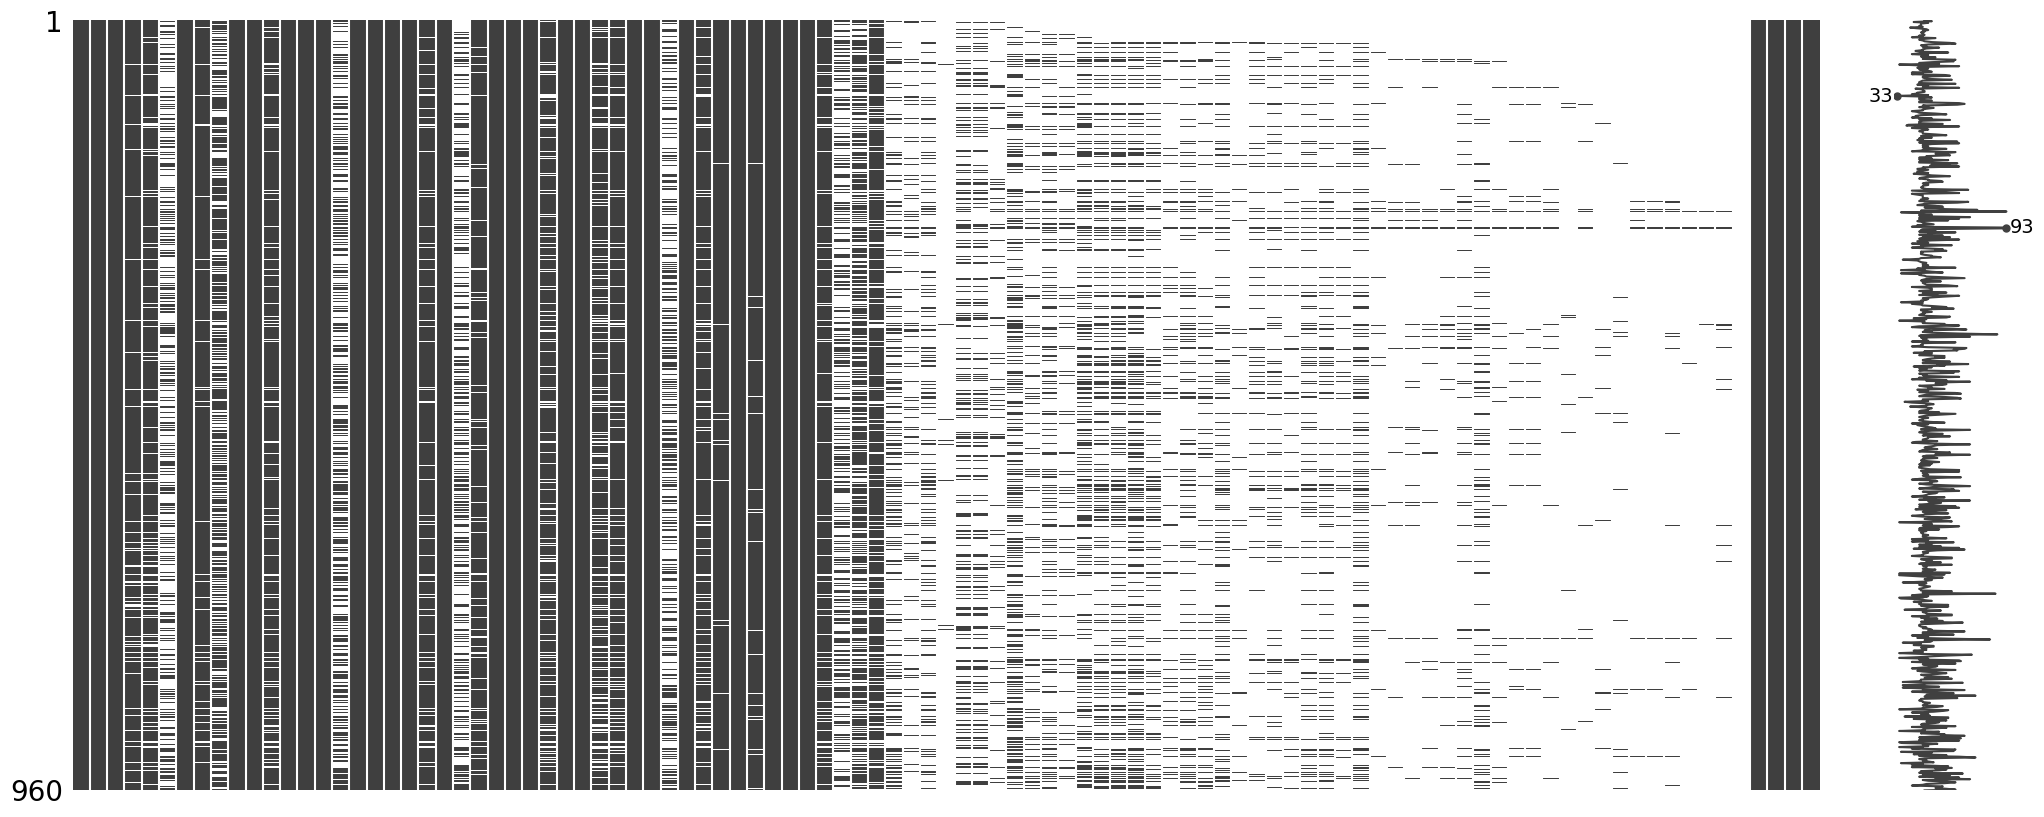

In [105]:
missingno.matrix(Laptop_Details)

In [13]:
df.isna().sum()


Unnamed: 0                 0
index                      0
Covered in Warranty        0
Warranty Service Type      0
Processor Variant         68
                        ... 
Optane Memory            959
Rating                    79
price                      0
Link                       0
Names                      0
Length: 102, dtype: int64